In [1]:
!pip install kaggle kagglehub
import kagglehub
import zipfile
import pandas as pd
import os
from google.colab import files


In [2]:
print("Please upload your kaggle.json file.")
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Please upload your kaggle.json file.


Saving archive (5).zip to archive (5).zip
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
dataset_name = "marlesson/myanimelist-dataset-animes-profiles-reviews"
zip_file = "myanimelist-dataset-animes-profiles-reviews.zip"

if not os.path.exists(zip_file):
    print(f"Downloading {dataset_name}...")
    !kaggle datasets download -d {dataset_name}
else:
    print(f"{zip_file} already exists. Skipping download.")


Dataset URL: https://www.kaggle.com/datasets/marlesson/myanimelist-dataset-animes-profiles-reviews
License(s): CC0-1.0
 89% 193M/217M [00:01<00:00, 108MB/s]
100% 217M/217M [00:01<00:00, 116MB/s]


In [4]:
if not os.path.exists('animes.csv'):
    print("Unzipping the dataset...")
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall('/content')
else:
    print("Dataset already unzipped.")


Unzipping the dataset...


In [5]:
print("Files in the current directory:")
print(os.listdir('/content'))


Files in the current directory:
['.config', 'animes.csv', 'myanimelist-dataset-animes-profiles-reviews.zip', 'reviews.csv', 'profiles.csv', 'archive (5).zip', 'sample_data']


In [6]:
csv_file = '/content/animes.csv'
if os.path.exists(csv_file):
    anime_data = pd.read_csv(csv_file)
    print("First 5 rows of the dataset:")
    print(anime_data.head())

    print("\nColumns in the dataset:")
    print(anime_data.columns)


First 5 rows of the dataset:
     uid                             title  \
0  28891           Haikyuu!! Second Season   
1  23273           Shigatsu wa Kimi no Uso   
2  34599                     Made in Abyss   
3   5114  Fullmetal Alchemist: Brotherhood   
4  31758  Kizumonogatari III: Reiketsu-hen   

                                            synopsis  \
0  Following their participation at the Inter-Hig...   
1  Music accompanies the path of the human metron...   
2  The Abyss—a gaping chasm stretching down into ...   
3  "In order for something to be obtained, someth...   
4  After helping revive the legendary vampire Kis...   

                                               genre  \
0  ['Comedy', 'Sports', 'Drama', 'School', 'Shoun...   
1  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   
2  ['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...   
3  ['Action', 'Military', 'Adventure', 'Comedy', ...   
4   ['Action', 'Mystery', 'Supernatural', 'Vampire']   

                    

In [8]:
if 'score' in anime_data.columns and 'genre' in anime_data.columns:
    anime_data['genre'] = anime_data['genre'].str.split(', ')
    exploded_genres = anime_data.explode('genre')
    genre_scores = exploded_genres.groupby('genre')['score'].mean().reset_index()
    top_genres = genre_scores.sort_values(by='score', ascending=False).head(10)

    print("\nTop 10 genres based on average score:")
    print(top_genres)
else:
    print("The required columns 'score' and/or 'genre' are missing in the dataset.")



Top 10 genres based on average score:
                genre     score
157       ['Thriller'  8.260000
111          ['Josei'  8.250000
118  ['Martial Arts']  7.520000
26            'Josei'  7.452857
40          'Mystery'  7.432705
76         'Thriller'  7.402059
46    'Psychological'  7.397587
125        ['Mystery'  7.361775
77        'Thriller']  7.345179
64          'Shounen'  7.325826

Top 10 genres based on average score:
Empty DataFrame
Columns: [genre, score]
Index: []


Columns in the dataset:
Index(['uid', 'title', 'synopsis', 'genre', 'aired', 'episodes', 'members',
       'popularity', 'ranked', 'score', 'img_url', 'link'],
      dtype='object')

Top 10 genres based on average score:
                genre     score
157       ['Thriller'  8.260000
111          ['Josei'  8.250000
118  ['Martial Arts']  7.520000
26            'Josei'  7.452857
40          'Mystery'  7.432705
76         'Thriller'  7.402059
46    'Psychological'  7.397587
125        ['Mystery'  7.361775
77        'Thriller']  7.345179
64          'Shounen'  7.325826


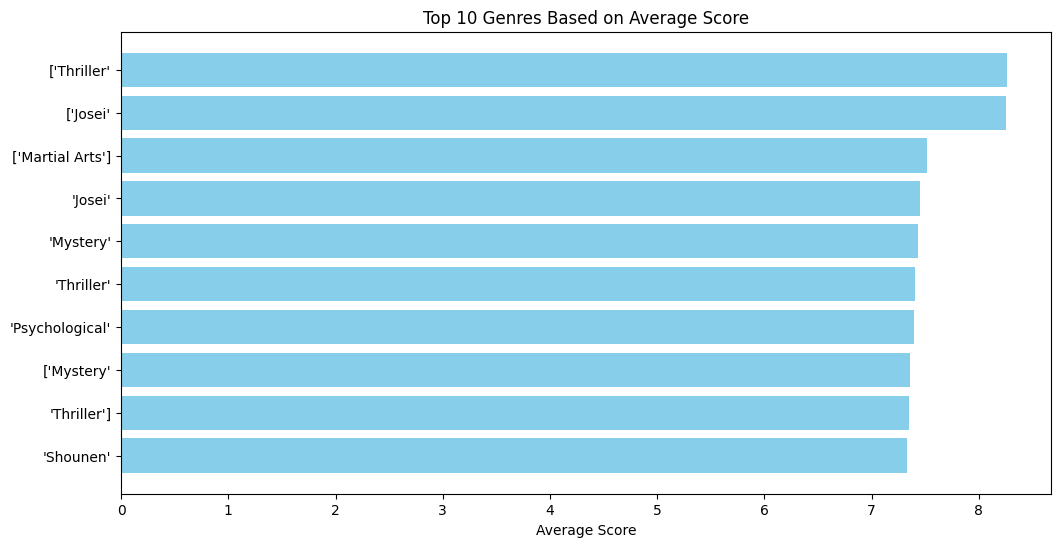

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming anime_data is already loaded
csv_file = '/content/animes.csv'
anime_data = pd.read_csv(csv_file)

print("Columns in the dataset:")
print(anime_data.columns)

if 'score' in anime_data.columns and 'genre' in anime_data.columns:
    anime_data['genre'] = anime_data['genre'].str.split(', ')
    exploded_genres = anime_data.explode('genre')
    genre_scores = exploded_genres.groupby('genre')['score'].mean().reset_index()
    top_genres = genre_scores.sort_values(by='score', ascending=False).head(10)

    print("\nTop 10 genres based on average score:")
    print(top_genres)

    plt.figure(figsize=(12, 6))
    plt.barh(top_genres['genre'], top_genres['score'], color='skyblue')
    plt.xlabel('Average Score')
    plt.title('Top 10 Genres Based on Average Score')
    plt.gca().invert_yaxis()  # Invert y axis to have the highest score on top
    plt.show()
else:
    print("The required columns 'score' and/or 'genre' are missing in the dataset.")
